In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
import nltk
nltk.download('punkt')
from nltk import punkt
import seaborn as sns
import scipy.stats as stats
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
import string
from wordcloud import WordCloud
from collections import Counter



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df = pd.read_csv('/content/spam.csv', encoding = 'latin-1')

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1137,ham,LOL ... No just was busy,NaN,NaN,NaN
3758,ham,"GOD ASKED, \What is forgiveness?\"" A little ch...","\""It is d wonderful fruit that a tree gives w...",NaN,NaN
3847,ham,Can you plz tell me the ans. BSLVYL sent via f...,NaN,NaN,NaN
3875,ham,did u get that message,NaN,NaN,NaN
3672,ham,Moji just informed me that you saved our lives...,NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

#Data Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [9]:
#remove last three columns
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
#renaming features name
df.rename(columns = {'v1' : 'target', 'v2' : 'message'}, inplace = True)

In [12]:
df.sample(5)

,target,message
713,ham,Save yourself the stress. If the person has a ...
4084,spam,Orange brings you ringtones from all time Char...
3728,ham,I'm at home. Please call
4406,ham,"Awesome, plan to get here any time after like ..."
1166,ham,I am not having her number sir


In [13]:
#Lable encoding the Output column

label_encoder = LabelEncoder()
df['target'] = pd.DataFrame(label_encoder.fit_transform(df['target']))


In [14]:
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [15]:
#check Missing Values
df.isnull().sum()

,0
target,0
message,0


In [16]:
#check Duplicated Values
df.duplicated().sum()

403

In [17]:
df = df.drop_duplicates(keep = 'first')

In [18]:
df.duplicated().sum()
#duplicates removed successfully

0

In [19]:
df.shape

(5169, 2)

#Exploratory Data Analysis(EDA)

In [20]:
df['num_characters'] = df['message'].apply(len)

<ipython-input-20-5ebcfda04ef0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['message'].apply(len)


In [21]:
df.head()

,target,message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df['num_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [24]:
df['num_sentence'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,message,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,target,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.977945,18.455794,1.965564
std,0.332253,58.236293,13.324758,1.448541
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [27]:
only_ham = df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()
only_ham

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
only_spam = df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()
only_spam

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


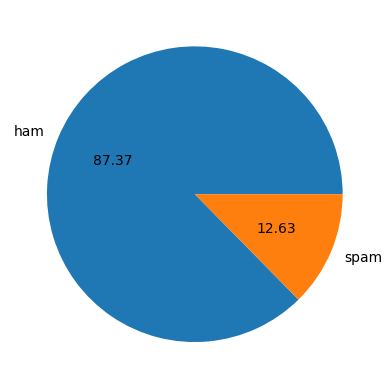

In [29]:
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct='%0.2f')
plt.show()

<ipython-input-30-9d303e6d6a3f>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_characters'])


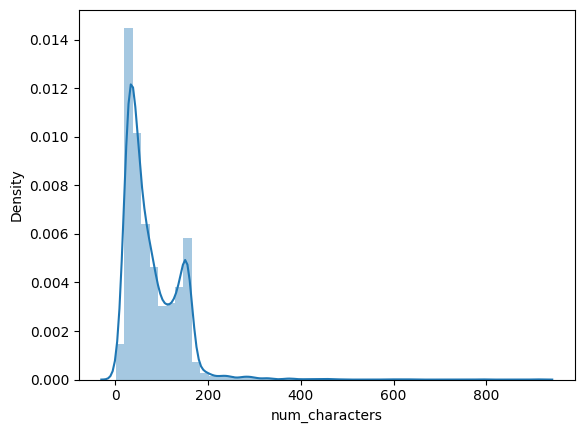

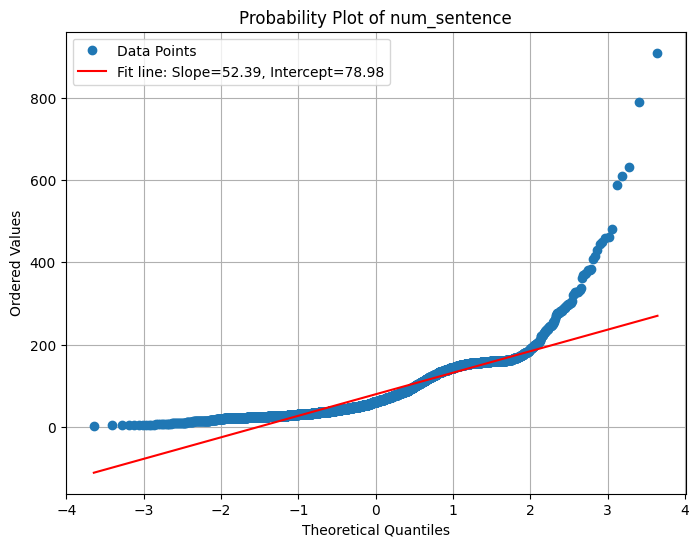

In [30]:
sns.distplot(df['num_characters'])
(probabilities, values), (slope, intercept, r) = stats.probplot(df['num_characters'], dist="norm")

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(probabilities, values, 'o', label='Data Points')
plt.plot(probabilities, slope*probabilities + intercept, 'r-', label=f'Fit line: Slope={slope:.2f}, Intercept={intercept:.2f}')
plt.title('Probability Plot of num_sentence')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-31-451538dd86b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_words'])


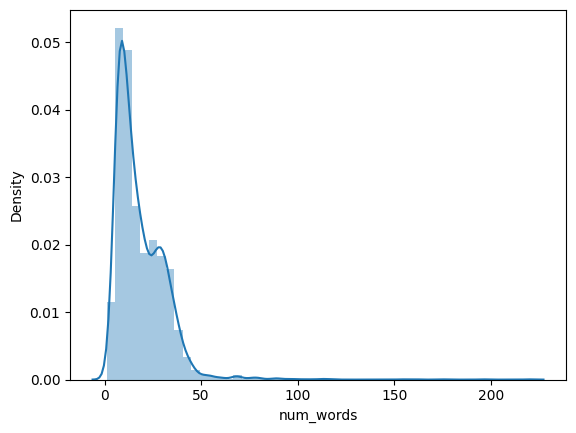

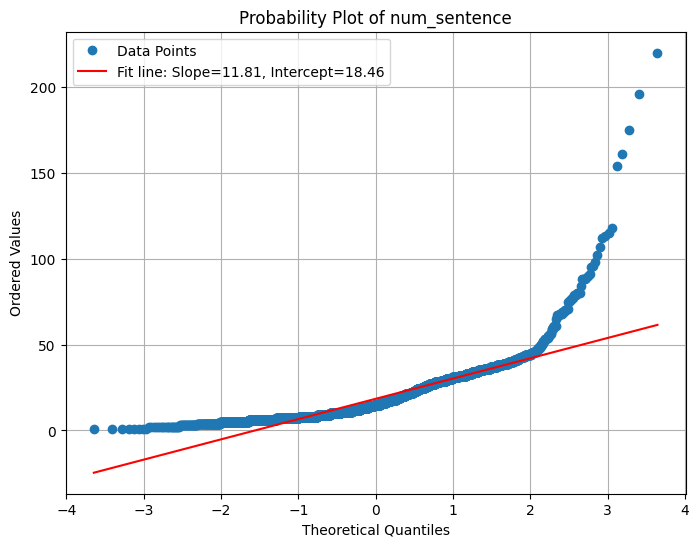

In [31]:
sns.distplot(df['num_words'])
(probabilities, values), (slope, intercept, r) = stats.probplot(df['num_words'], dist="norm")

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(probabilities, values, 'o', label='Data Points')
plt.plot(probabilities, slope*probabilities + intercept, 'r-', label=f'Fit line: Slope={slope:.2f}, Intercept={intercept:.2f}')
plt.title('Probability Plot of num_sentence')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.legend()
plt.grid(True)
plt.show()

<ipython-input-32-f92f07786461>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['num_sentence'])


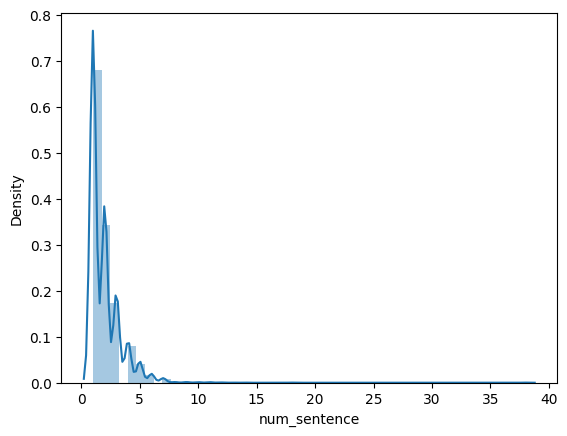

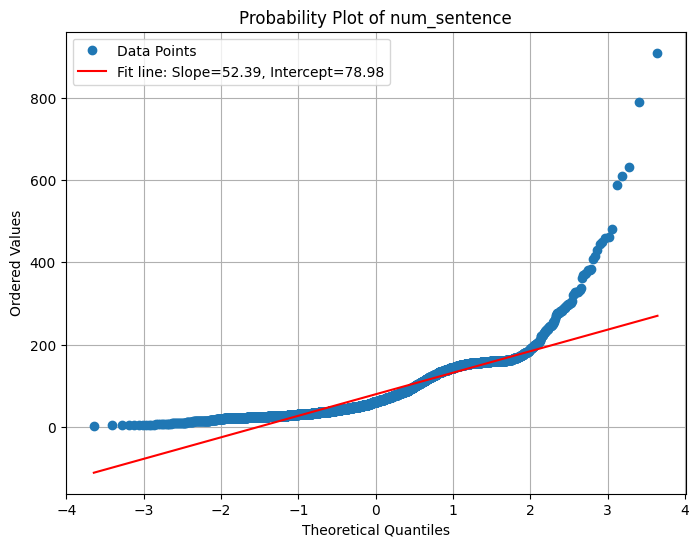

In [32]:
sns.distplot(df['num_sentence'])

(probabilities, values), (slope, intercept, r) = stats.probplot(df['num_characters'], dist="norm")

# Plot the data
plt.figure(figsize=(8, 6))
plt.plot(probabilities, values, 'o', label='Data Points')
plt.plot(probabilities, slope*probabilities + intercept, 'r-', label=f'Fit line: Slope={slope:.2f}, Intercept={intercept:.2f}')
plt.title('Probability Plot of num_sentence')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.legend()
plt.grid(True)
plt.show()


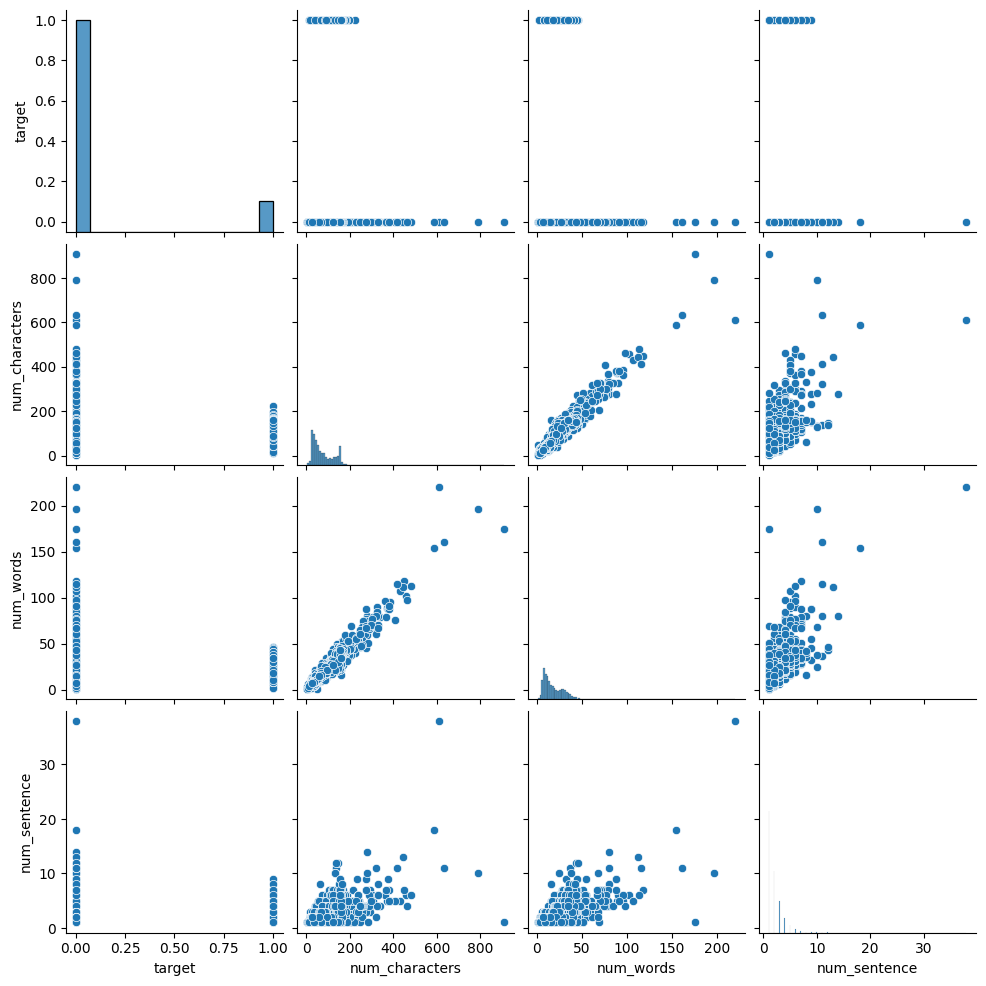

In [33]:
sns.pairplot(df)

In [34]:
df1 = df.drop(columns = ['message'])

<Axes: >

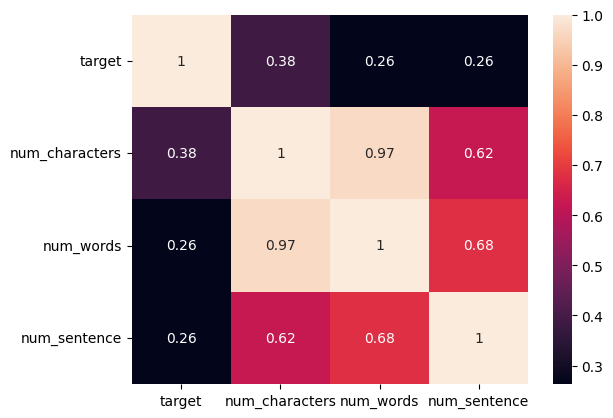

In [35]:
sns.heatmap(df1.corr(), annot=True)

#Text Preprocessing

In [36]:
ps = PorterStemmer()

In [37]:
def transform_text(text):
#Tokenize and lower case
  text = text.lower()
  text = nltk.word_tokenize(text)
#Check special Characters
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()
#Removing stopwords and Punctuation
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
#Stemming converting into base word
  for i in text:
    y.append(ps.stem(i))
  return ' '.join(y)

In [38]:
#Fuction for checking
text = "Hi My intializing is Zeyam Ali Matharu$"
transform_text(text)

'hi intial zeyam ali matharu'

In [39]:
df['Transformed_column'] = df['message'].apply(transform_text)

In [40]:
print(df['Transformed_column'])

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Transformed_column, Length: 5169, dtype: object


In [41]:
df.head()

,target,message,num_characters,num_words,num_sentence,Transformed_column
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#Word Cloud(Most Common words)

In [42]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [43]:
spam_wc = wc.generate(df[df['target']==1]['Transformed_column'].str.cat(sep = " "))

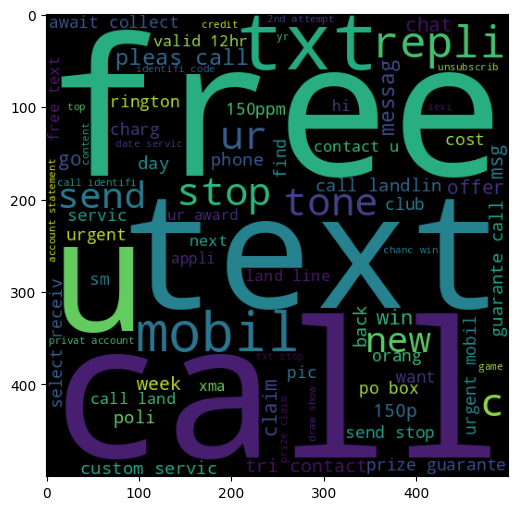

In [44]:
plt.figure(figsize=(16,6))
plt.imshow(spam_wc)

In [45]:
ham_wc = wc.generate(df[df['target']==0]['Transformed_column'].str.cat(sep = " "))

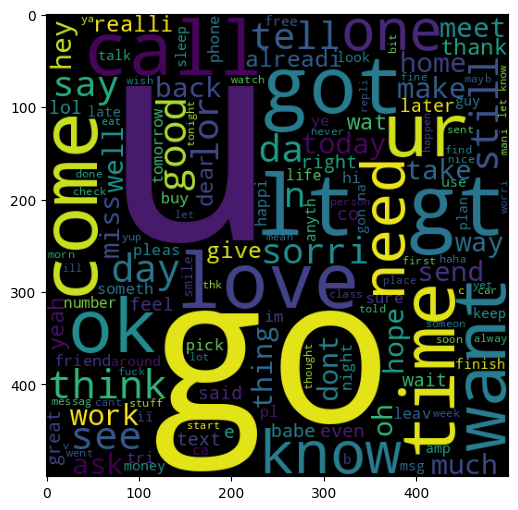

In [46]:
plt.figure(figsize=(16,6))
plt.imshow(ham_wc)

In [47]:
list_spam = []
sentence = df[df['target']==1]['Transformed_column'].tolist()
for sent in sentence:
  for word in sent.split():
    list_spam.append(word)

In [48]:
len(list_spam)

9939

In [49]:
word_counts = Counter(list_spam)

In [50]:
top_30_words = word_counts.most_common(30)

In [51]:
df_top_words = pd.DataFrame(top_30_words, columns=['word','count'])

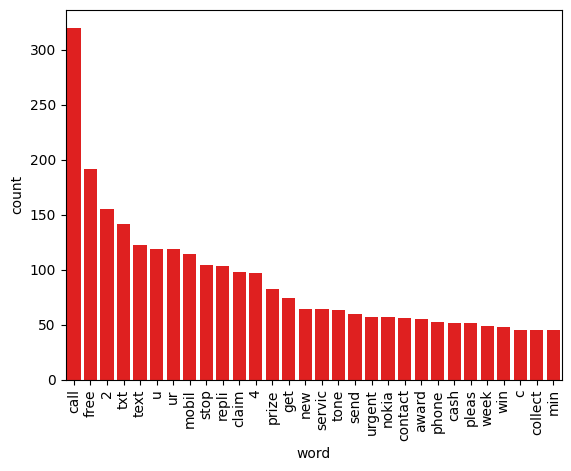

In [52]:
sns.barplot(x = 'word', y= 'count', data = df_top_words, color='red')
plt.xticks(rotation =90)
plt.show()

In [53]:
#for ham
sentence= df[df['target']==0]['Transformed_column'].tolist()

In [54]:
list_ham = []
for sent in sentence:
  for word in sent.split():
    list_ham.append(word)

In [55]:
len(list_ham)

35404

In [56]:
word_counts = Counter(list_ham)

In [57]:
top_30_words = word_counts.most_common(30)

In [58]:
df_top_words = pd.DataFrame(top_30_words,columns = ['word','count'])

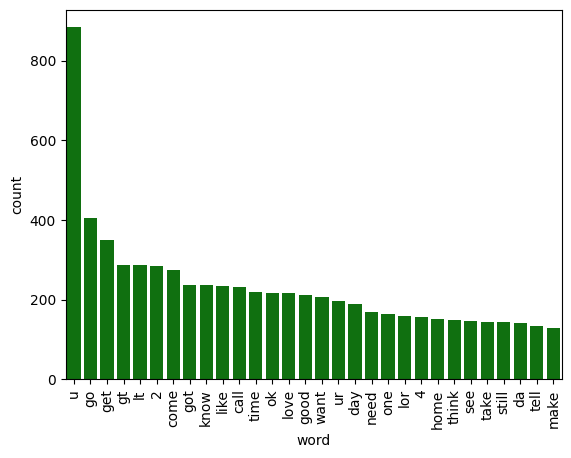

In [59]:
sns.barplot(x='word', y= 'count', data = df_top_words, color = 'green')
plt.xticks(rotation =90)
plt.show()

#Model Building

In [60]:

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB
from sklearn.svm import SVC

In [61]:
lg = LogisticRegression(solver='liblinear',penalty='l1')
dt = DecisionTreeClassifier(max_depth=5)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(n_estimators=50, random_state=2)
etrf = ExtraTreesClassifier(n_estimators=50,random_state = 2)
ab = AdaBoostClassifier(n_estimators=50,random_state =2)
mnb = MultinomialNB()
bnb = BernoulliNB()
gnb = GaussianNB()
svc = SVC(kernel ='sigmoid',gamma=1.0)

In [62]:
#convert text data into vectors
cv = CountVectorizer()
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['Transformed_column']).toarray()


In [63]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [64]:
x.shape

(5169, 6708)

In [65]:
y = df['target'].values

In [66]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [67]:
y.shape

(5169,)

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [69]:
clfs = {
    'lg':lg,
    'dt':dt,
    'knn':knn,
    'rf':rf,
    'etrf':etrf,
    'ab':ab,
    'mnb':mnb,
    'bnb':bnb,
    'gnb':gnb,
    'svc':svc

}

In [70]:
accuracy = []
precision = []

for name,clf in clfs.items():
  clf.fit(x_train,y_train)
  y_pred = clf.predict(x_test)
  current_accuracy = accuracy_score(y_test,y_pred)
  current_confusion_matrix = confusion_matrix(y_test,y_pred)
  current_precision = precision_score(y_test,y_pred)
  accuracy.append(current_accuracy)
  precision.append(current_precision)
  print(name)
  print(f"'accuracy: '{current_accuracy}")
  print(f"'precision: '{current_precision}")
  print(f"'confusion_metrix: '{current_confusion_matrix}")



lg
'accuracy: '0.9439071566731141
'precision: '0.865546218487395
'confusion_metrix: '[[873  16]
 [ 42 103]]
dt
'accuracy: '0.9332688588007737
'precision: '0.8064516129032258
'confusion_metrix: '[[865  24]
 [ 45 100]]
knn
'accuracy: '0.8965183752417795
'precision: '1.0
'confusion_metrix: '[[889   0]
 [107  38]]
rf
'accuracy: '0.9700193423597679
'precision: '0.9913793103448276
'confusion_metrix: '[[888   1]
 [ 30 115]]
etrf
'accuracy: '0.9738878143133463
'precision: '0.9916666666666667
'confusion_metrix: '[[888   1]
 [ 26 119]]
ab
'accuracy: '0.9477756286266924
'precision: '0.8421052631578947
'confusion_metrix: '[[868  21]
 [ 33 112]]
mnb
'accuracy: '0.9613152804642167
'precision: '0.9906542056074766
'confusion_metrix: '[[888   1]
 [ 39 106]]
bnb
'accuracy: '0.9661508704061895
'precision: '0.9661016949152542
'confusion_metrix: '[[885   4]
 [ 31 114]]
gnb
'accuracy: '0.8636363636363636
'precision: '0.5084033613445378
'confusion_metrix: '[[772 117]
 [ 24 121]]
svc
'accuracy: '0.97195357833

In [71]:
pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy,'Precision':precision}).sort_values('Accuracy',ascending = False)

,Algorithm,Accuracy,Precision
4,etrf,0.973888,0.991667
9,svc,0.971954,0.939394
3,rf,0.970019,0.991379
7,bnb,0.966151,0.966102
6,mnb,0.961315,0.990654
5,ab,0.947776,0.842105
0,lg,0.943907,0.865546
1,dt,0.933269,0.806452
2,knn,0.896518,1.000000
8,gnb,0.863636,0.508403


In [73]:
import pickle
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(etrf,open('model.pkl','wb'))